### BASIC HOUSE PREDICTION

In [ ]:
import tensorflow as tf
import numpy as np

def house_model(y_new):
    xs = [2, 4, 5, 8, 9, 1, 12, 6, 9, 13] 
    ys = [1.5, 2.5, 3.0, 4.5, 5.0, 1.0, 6.5, 3.5, 5.0, 7.0]

    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(units=1, input_shape=(1,), activation="linear")
        ]
    )

    model.compile(loss="mean_squared_error", optimizer="sgd")
    model.fit(xs, ys, epochs=500)
    return model.predict(y_new)[0]

prediction = house_model([7.0])
print(prediction)

### MNIST CLASSIFIER (NO CONV)

In [ ]:
# mnist classifier
import tensorflow as tf
dataset = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

train_images = train_images / 255.
test_images = test_images / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

# writing custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("accuracy") >0.9):
            print("\nReached 90% training accuracy so cancelling training further!")
            self.model.stop_training = True

callbacks = myCallback()
model.fit(train_images, train_labels, epochs=100, callbacks=[callbacks])
print('evaluating')
model.evaluate(test_images, test_labels)

Epoch 1/100
  42/1875 [..............................] - ETA: 6s - loss: 1.3390 - accuracy: 0.5632

2022-01-02 08:27:44.885162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5184 - accuracy: 0.8222
Epoch 2/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3932 - accuracy: 0.8608
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3562 - accuracy: 0.8736
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3306 - accuracy: 0.8808
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3126 - accuracy: 0.8861
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2988 - accuracy: 0.8903
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2880 - accuracy: 0.8943
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.8974
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2689 - accuracy: 0.9001

Reached 90% training accuracy so cancelling training further!
evaluating
 44/313 [==

2022-01-02 08:28:44.729504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8789


[0.34711772203445435, 0.8789000511169434]

### MNIST CLASSIFIER (CONV)

In [ ]:
import tensorflow as tf
dataset = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.
test_images = test_images / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])
print("evaluating")
model.evaluate(test_images, test_labels)

### RAW CONVOLUTIONS

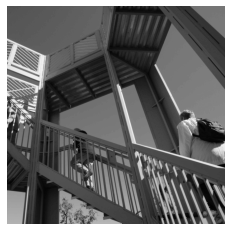

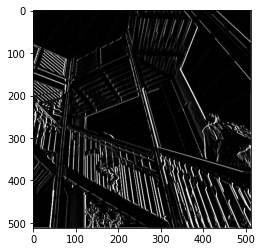

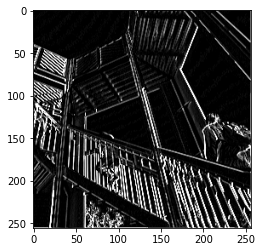

In [ ]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2), int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show() 

### HORSE-HUMAN CLASSIFIER (WITH VAL)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

import os
import zipfile

local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/horse-or-human")
zip_ref.close()
local_zip = "/tmp/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/validation-horse-or-human")
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",
                optimizer=RMSprop(lr=0.001),
                metrics=["accuracy"])

# data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# scaling images
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# flowing training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    directory="/tmp/horse-or-human/",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)
validation_generator = validation_datagen.flow_from_directory(
    directory="/tmp/validation-horse-or-human/",
    target_size=(300, 300),
    batch_size=32,
    class_mode="binary"
)

history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8)

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'valhuman04-20.png', 'valhuman03-01.png', 'human10-17.png', 'valhuman04-08.png', 'human10-03.png', 'valhuman03-15.png', 'human07-27.png', 'human09-22.png', 'human05-22.png']
total training horse images: 628
total training human images: 655
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (Ma

/Users/prashant/miniforge3/envs/miniforge38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15


2022-01-02 09:47:25.215726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 2.5401 - accuracy: 0.5000

2022-01-02 09:47:31.659985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 7s 785ms/step - loss: 2.5401 - accuracy: 0.5000 - val_loss: 0.6487 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 6s 751ms/step - loss: 0.6739 - accuracy: 0.6992 - val_loss: 0.4044 - val_accuracy: 0.9375
Epoch 3/15
8/8 [==============================] - 6s 715ms/step - loss: 0.5065 - accuracy: 0.7464 - val_loss: 0.9814 - val_accuracy: 0.7578
Epoch 4/15
8/8 [==============================] - 6s 751ms/step - loss: 0.5883 - accuracy: 0.8087 - val_loss: 0.3666 - val_accuracy: 0.9141
Epoch 5/15
8/8 [==============================] - 7s 784ms/step - loss: 0.4747 - accuracy: 0.8027 - val_loss: 0.2751 - val_accuracy: 0.9102
Epoch 6/15
8/8 [==============================] - 7s 756ms/step - loss: 0.3080 - accuracy: 0.8754 - val_loss: 0.2207 - val_accuracy: 0.9219
Epoch 7/15
8/8 [==============================] - 6s 748ms/step - loss: 0.2448 - accuracy: 0.9266 - val_loss: 0.2429 - val_accuracy: 0.9141
Epoch 8/15
8/8 [===============

### CATS-AND-DOGS 

--2022-01-02 10:59:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:812::2010, 2404:6800:4009:813::2010, 2404:6800:4009:81a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:812::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  22.0MB/s    in 3.0s    

2022-01-02 10:59:33 (22.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = "/tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
                loss="binary_crossentropy",
                metrics=["accuracy"])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=1/255.,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest")
                                    
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode="binary",
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode="binary",
                                                    target_size=(150, 150))

history = model.fit(train_generator,
validation_data=validation_generator,
steps_per_epoch=100,
epochs=100,
validation_steps=50,
verbose=1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

--2022-01-02 11:19:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:812::2010, 2404:6800:4009:813::2010, 2404:6800:4009:81a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:812::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  25.0MB/s    in 2.6s    

2022-01-02 11:19:21 (25.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']
total training cat images : 1000
total trai

/Users/prashant/miniforge3/envs/miniforge38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-01-02 11:19:23.049321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.7960 - accuracy: 0.5210

2022-01-02 11:19:30.891739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 89ms/step - loss: 0.7960 - accuracy: 0.5210 - val_loss: 0.6866 - val_accuracy: 0.5840
Epoch 2/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6940 - accuracy: 0.5600 - val_loss: 0.6750 - val_accuracy: 0.5990
Epoch 3/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6819 - accuracy: 0.5835 - val_loss: 0.6480 - val_accuracy: 0.6530
Epoch 4/100
100/100 [==============================] - 9s 89ms/step - loss: 0.6643 - accuracy: 0.6175 - val_loss: 0.7092 - val_accuracy: 0.5520
Epoch 5/100
100/100 [==============================] - 9s 89ms/step - loss: 0.6523 - accuracy: 0.6235 - val_loss: 0.6150 - val_accuracy: 0.6350
Epoch 6/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6440 - accuracy: 0.6280 - val_loss: 0.5932 - val_accuracy: 0.6790
Epoch 7/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6221 - accuracy: 0.6570 - val_loss: 0.6220 - val_accuracy: 0.6350
Epoc

### CATS-VS-DOGS (PRETRAINED)

--2022-01-03 12:08:00--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:804::2010, 2404:6800:4009:801::2010, 2404:6800:4009:832::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:804::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  17.9MB/s    in 5.2s    

2022-01-03 12:08:07 (16.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)           

/Users/prashant/miniforge3/envs/miniforge38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.4MB/s    in 3.2s    

2022-01-03 12:08:12 (20.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2022-01-03 12:08:14.176947: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-03 12:08:14.178084: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-01-03 12:08:14.873016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.2738 - accuracy: 0.8950

2022-01-03 12:08:28.579461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 17s 146ms/step - loss: 0.2738 - accuracy: 0.8950 - val_loss: 0.1264 - val_accuracy: 0.9590
Epoch 2/20
100/100 [==============================] - 14s 142ms/step - loss: 0.1416 - accuracy: 0.9500 - val_loss: 0.1032 - val_accuracy: 0.9580
Epoch 3/20
100/100 [==============================] - 15s 145ms/step - loss: 0.1260 - accuracy: 0.9480 - val_loss: 0.0846 - val_accuracy: 0.9680
Epoch 4/20
100/100 [==============================] - 14s 143ms/step - loss: 0.1082 - accuracy: 0.9575 - val_loss: 0.0844 - val_accuracy: 0.9680
Epoch 5/20
100/100 [==============================] - 14s 144ms/step - loss: 0.1107 - accuracy: 0.9560 - val_loss: 0.0814 - val_accuracy: 0.9700
Epoch 6/20
100/100 [==============================] - 14s 143ms/step - loss: 0.0954 - accuracy: 0.9645 - val_loss: 0.0817 - val_accuracy: 0.9670
Epoch 7/20
100/100 [==============================] - 14s 143ms/step - loss: 0.0958 - accuracy: 0.9630 - val_loss: 0.0805 - val_accuracy: 0.9

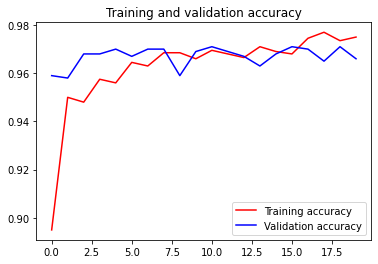

<Figure size 432x288 with 0 Axes>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                    include_top=False,
                                    weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

print(pre_trained_model.summary())

last_layer = pre_trained_model.get_layer("mixed7")
print("last layers output shapes: ", last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(units=1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(units=1, activation="sigmoid")(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.00001),
                loss="binary_crossentropy",
                metrics=["accuracy"])
model.summary()

!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = "/tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=1/255.,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest")
                                    
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode="binary",
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode="binary",
                                                    target_size=(150, 150))

history = model.fit(train_generator,
validation_data=validation_generator,
steps_per_epoch=100,
epochs=20,
validation_steps=50,
verbose=1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### ROCK-PAPER-SCISSORS

--2022-01-03 12:33:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:832::2010, 2404:6800:4009:810::2010, 2404:6800:4009:801::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:832::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  28.0MB/s    in 7.4s    

2022-01-03 12:33:16 (26.0 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-01-03 12:33:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:810::2010, 2404:6800:4009:801::2010, 2404:6800:4009:804::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:810::2010|:443... connected.
HTTP request sent, awai

2022-01-03 12:33:21.568820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 1.5423 - accuracy: 0.3710

2022-01-03 12:33:35.553408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 15s 726ms/step - loss: 1.5423 - accuracy: 0.3710 - val_loss: 1.1018 - val_accuracy: 0.4624
Epoch 2/25
20/20 [==============================] - 15s 718ms/step - loss: 1.0142 - accuracy: 0.4865 - val_loss: 1.0509 - val_accuracy: 0.4624
Epoch 3/25
20/20 [==============================] - 14s 698ms/step - loss: 0.8167 - accuracy: 0.6373 - val_loss: 0.9527 - val_accuracy: 0.7527
Epoch 4/25
20/20 [==============================] - 15s 714ms/step - loss: 0.7086 - accuracy: 0.6901 - val_loss: 0.6350 - val_accuracy: 0.6989
Epoch 5/25
20/20 [==============================] - 15s 713ms/step - loss: 0.5754 - accuracy: 0.7635 - val_loss: 0.4707 - val_accuracy: 0.9005
Epoch 6/25
20/20 [==============================] - 15s 718ms/step - loss: 0.5237 - accuracy: 0.7782 - val_loss: 0.4136 - val_accuracy: 0.8952
Epoch 7/25
20/20 [==============================] - 15s 717ms/step - loss: 0.4513 - accuracy: 0.8214 - val_loss: 4.7303 - val_accuracy: 0.3333
Epoch 8/25

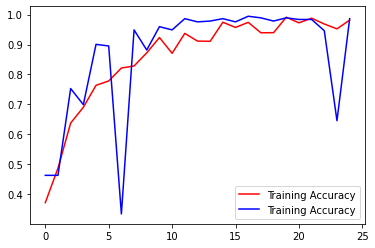

<Figure size 432x288 with 0 Axes>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale= 1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode="categorical",
    batch_size=128,
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode="categorical",
    batch_size=128
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data=validation_generator, verbose=1, validation_steps=3)
model.save("rps.h5")

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Training Accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#### SPLIT DATA FUNCTION

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):    
    # YOUR CODE STARTS HERE
    all_files = os.listdir(SOURCE)
    # random shuffling the filenames
    random.shuffle(all_files)
    
    split_point = int(len(all_files) * SPLIT_SIZE)
    train_set = all_files[:split_point]
    test_set = all_files[split_point:]
    
    # print(len(all_files))
    # print(len(train_set))
    # print(len(test_set))
    for img in train_set:
        if os.path.getsize(os.path.join(SOURCE, img)) != 0:
            # print(os.path.join(SOURCE, img), os.path.join(TRAINING, img))  
            copyfile(os.path.join(SOURCE, img), os.path.join(TRAINING, img))
    for img in test_set:
        if os.path.getsize(os.path.join(SOURCE, img)) != 0:
            copyfile(os.path.join(SOURCE, img), os.path.join(TESTING, img))
    # YOUR CODE ENDS HERE


# CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
# TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
# TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
# DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
# TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
# TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

# split_size = .9
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
# split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

### HORSE-HUMAN (TRANSFER LEARNING)

--2022-01-03 12:58:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4007:818::2010, 2404:6800:4007:819::2010, 2404:6800:4007:81a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4007:818::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  28.7MB/s    in 5.6s    

2022-01-03 12:58:37 (25.4 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-01-03 12:58:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4007:819::2010, 2404:6800:4007:81a::2010, 2404:6800:4007:81b::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4007:819::2

/Users/prashant/miniforge3/envs/miniforge38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/3


2022-01-03 12:58:58.416455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - ETA: 0s - loss: 0.1251 - accuracy: 0.9509

2022-01-03 12:59:12.231855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - 16s 115ms/step - loss: 0.1251 - accuracy: 0.9509 - val_loss: 0.0147 - val_accuracy: 0.9922
Epoch 2/3
129/129 [==============================] - 15s 115ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0048 - val_accuracy: 0.9961

Reached 97% accuracy so stopping further training!


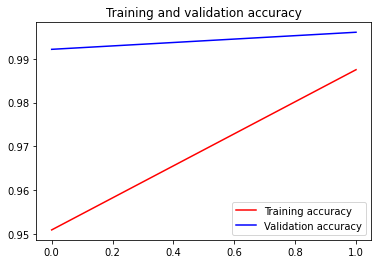

<Figure size 432x288 with 0 Axes>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

import os
import zipfile

local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/horse-or-human")
zip_ref.close()
local_zip = "/tmp/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/validation-horse-or-human")
zip_ref.close()

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

import os
import tensorflow as tf
from os import getcwd

path_inception = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.97):
            print("\nReached 97% accuracy so stopping further training!")
            self.model.stop_training = True

from tensorflow.keras.optimizers import RMSprop

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units=1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

model = Model(pre_trained_model.inputs, x)

model.compile(optimizer=RMSprop(lr=0.0001),
loss="binary_crossentropy",
metrics=["accuracy"])

model.summary()

train_dir = "/tmp/horse-or-human"
validation_dir = "/tmp/validation-horse-or-human"

horses_path = "horses"
humans_path = "humans"

train_horses_dir = os.path.join(train_dir, horses_path)
train_humans_dir = os.path.join(train_dir, humans_path)
validation_horses_dir = os.path.join(validation_dir, horses_path)
validation_humans_dir = os.path.join(validation_dir, humans_path)

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

train_datagen = ImageDataGenerator(rescale=1/255.,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   class_mode = 'binary',
                                                   batch_size = 10
                                                   )

validation_generator =  test_datagen.flow_from_directory(validation_dir, 
                                                   target_size = (150, 150),
                                                   class_mode = 'binary',
                                                   batch_size = 10                                                        
                                                    )
callbacks = myCallback()
history = model.fit(train_generator,
validation_data=validation_generator,
epochs=3,
callbacks=[callbacks])

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#### CSV READER

In [ ]:
import csv
def get_data(filename):
    with open(filename) as training_file:
        lines = csv_reader(training_file)
        first_flag = 1

        image = []
        labels = []
        for line in lines:
            if first_flag:
                first_flag = 0
            else:
                label = line[0]
                labels.append(label)

                image = line[1:785]
                image = np.array_split(image, 28)
                images.append(image)

        images = np.array(images).astype("float")
        labels = np.array(labels).astype("float")
        return images, labels
        

## NLP

### NLP BASICS

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['i am my dog',
            "I, love my cat",
            "You love my dog!"]

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'my': 1, 'i': 2, 'dog': 3, 'love': 4, 'am': 5, 'cat': 6, 'you': 7}


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences=[
    "I love my dog",
    "I love my cat",
    "You love my dog!",
    "Do you think my dog is amazing?"
]

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = ", word_index)
print("\nSequences = ", sequences)
print("\nPadded Sequences:")
print(padded)

test_data = [
    "i really love my dog",
    "my dog loves my manatee"
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence= ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]

Test Sequence=  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


### SARCASM ANALYSIS

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O sarcasm.json

--2022-01-03 13:35:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4007:803::2010, 2404:6800:4007:809::2010, 2404:6800:4007:80a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4007:803::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  10.6MB/s    in 0.5s    

2022-01-03 13:35:17 (10.6 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

with open("sarcasm.json", "r") as f:
    datastore=json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding="post")
print(padded[0])
print(padded.shape)
list(word_index.items())[:10]

29657
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


[('<OOV>', 1),
 ('to', 2),
 ('of', 3),
 ('the', 4),
 ('in', 5),
 ('for', 6),
 ('a', 7),
 ('on', 8),
 ('and', 9),
 ('with', 10)]

### BBC TEXT ANALYSIS

In [ ]:
!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv -O bbc-text.csv

--2022-01-03 13:40:41--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:81d::2010, 2404:6800:4007:809::2010, 2404:6800:4007:80a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:81d::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  11.2MB/s    in 0.4s    

2022-01-03 13:40:42 (11.2 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [ ]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
li = []
with open("bbc-text.csv", mode="r", encoding="UTF-8") as csvfile:
    csvfiles = csv.reader(csvfile)
    for line in csvfiles:
        li.append(line)
        if len(li) > 10:
            break

In [ ]:
sentences = []
labels=[]
with open("bbc-text.csv", "r") as csvfile:
    csv_records = csv.reader(csvfile, delimiter= ",")
    first_line = True
    for line in csv_records:
        if first_line:
            first_line=False
        else:
            label = line[0]
            sentence = line[1]

            for stopw in stopwords:
                token = " " + stopw + " "
                sentence = sentence.replace(token, " ")
                sentence = sentence.replace("  ", " ")
            
            labels.append(label)
            sentences.append(sentence)

print(len(sentences))
print(sentences[0])

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

29714


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences)
print(padded[0])
print(padded.shape)

[  0   0   0 ... 949  87  87]
(2225, 2442)


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labels)
label_word_index = tokenizer.word_index
label_seq = tokenizer.texts_to_sequences(labels)

print(label_seq[:10])
print(label_word_index)

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5]]
{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


### IMDB CLASSIFICATION

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

imdb.keys()

train_data, test_data = imdb["train"], imdb["test"]

training_sentences = []
training_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf-8'))
    training_labels.append(l.numpy())

testing_sentences = []
testing_labels = []

for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf-8'))
    testing_labels.append(l.numpy())

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print(np.array(training_sentences).shape, training_labels.shape)
print(np.array(testing_sentences).shape, testing_labels.shape)

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = "post"
oov_token = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

reverse_word_index = {v:k for k,v in word_index.items()}

def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

print(decode_review(padded[3]))
print()
print(training_sentences[3])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

num_epochs=10
model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

sentence = "Tensorflow is an amazing library. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

# import io

# out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
# out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

# for word_num in range(1, vocab_size):
#     word = reverse_word_index[word_num]
#     embeddings = weights[word_num]
#     out_m.write(word + "\n")
#     out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

2.6.0
(25000,) (25000,)
(25000,) (25000,)
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received

This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves th

2022-01-03 16:17:18.882284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.7342

2022-01-03 16:17:28.285931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 11s 14ms/step - loss: 0.5040 - accuracy: 0.7342 - val_loss: 0.3778 - val_accuracy: 0.8319
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2411 - accuracy: 0.9060 - val_loss: 0.4065 - val_accuracy: 0.8195
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0938 - accuracy: 0.9768 - val_loss: 0.5256 - val_accuracy: 0.8020
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0249 - accuracy: 0.9966 - val_loss: 0.5868 - val_accuracy: 0.8082
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.6854 - val_accuracy: 0.8050
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.7308 - val_accuracy: 0.8103
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 8.7943e-04 - accuracy: 1.0000 - val_loss: 0.7827 - val_accuracy: 0.8108

### IMDB SUBWORDS

2.7.0


['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br']
Tokenized String is [247, 1084, 1077, 5878, 2, 247, 160, 272, 8044]
The original string: nothing ends adrian, nothing ever ends
247 ---> nothing 
1084 ---> ends 
1077 ---> ad
5878 ---> rian
2 ---> , 
247 ---> nothing 
160 ---> ever 
272 ---> end
8044 ---> s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7  

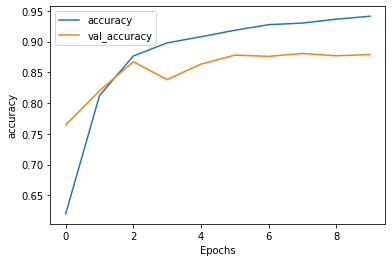

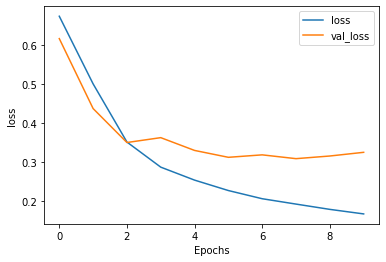

(8185, 64)


In [ ]:
import tensorflow as tf
print(tf.__version__)

!pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

train_data, test_data = imdb["train"], imdb["test"]

tokenizer = info.features["text"].encoder

print(tokenizer.subwords[:10])

sample_string = "nothing ends adrian, nothing ever ends"

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized String is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

for ts in tokenized_string:
    print("{} ---> {}".format(ts, tokenizer.decode([ts])))

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

num_epochs = 10
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

### IMDB SUBWORDS (MULTI LAYER LSTM)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

tokenizer = info.features["text"].encoder

BUFFER_SIZE=10000
BATCH_SIZE=64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

NUM_EPOCHS=10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

2.7.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 697,025
Trainable params: 697,025
No

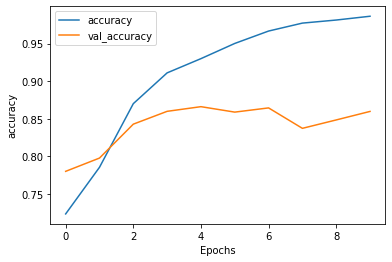

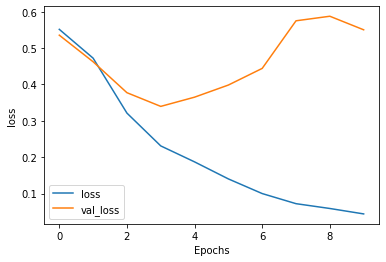

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### IMDB GRU

2.7.0
? ? ? ? ? ? ? ? i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation 

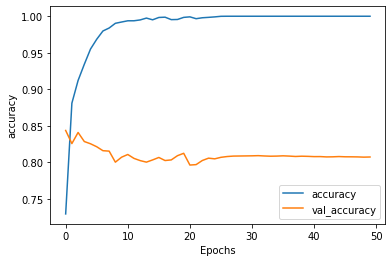

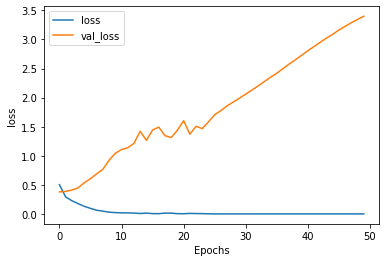

In [ ]:
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

import numpy as np

train_data, test_data = imdb["train"], imdb["test"]

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode("utf-8"))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(s.numpy().decode("utf-8"))
    testing_labels.append(l.numpy())

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = "post"
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

reverse_word_index = {v:k for k, v in word_index.items()}

def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

print(decode_review(padded[1]))
print()
print(training_sentences[1])

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                             tf.keras.layers.Dense(units=6, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

num_epochs = 50
history = model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


## TIME SERIES

### FEATURES AND LABELS

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

dataset = tf.data.Dataset.range(10)
for val in dataset:
    print(val.numpy())

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end="")
    print()

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x, y in dataset:
    print(x.numpy(), y.numpy())

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x, y in dataset:
    print(x.numpy(), y.numpy())

    
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x, y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())

2.7.0
0
1
2
3
4
5
6
7
8
9
01234
12345
23456
34567
45678
56789
6789
789
89
9
0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]
[0 1 2 3] [4]
x =  [[5 6 7 8]
 [1 2 3 4]]
y =  [[9]
 [5]]
x =  [[4 5 6 7]
 [0 1 2 3]]
y =  [[8]
 [4]]
x =  [[3 4 5 6]
 [2 3 4 5]]
y =  [[7]
 [6]]


### SINGLE LAYER NN

2.7.0
<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[ 0.00117692],
       [-0.011811  ],
       [-0.01983493],
       [-0.00521502],
       [ 0.04582772],
       [ 0.01670783],
       [ 0.01551294],
       [-0.02970571],
       [-0.06636383],
       [ 0.05354215],
       [ 0.07467227],
       [-0.05653964],
       [-0.05227719],
       [ 0.07938824],
       [-0.02909468],
       [ 0.06102544],
       [ 0.09734136],
       [ 0.14566329],
       [ 0.22235422],
       [ 0.4796462 ]], dtype=float32), array([0.01069203], dtype=float32)]


5.2863655

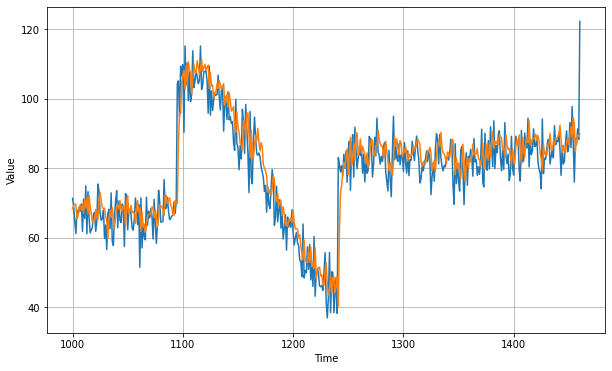

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series+= noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(units=1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, verbose=0)

print("Layer weights {}".format(l0.get_weights()))

forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

### DEEP NN

2.7.0
Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 1657.0078
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 85.1359
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 55.0587
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 53.2030
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 52.0686
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 50.9017
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 50.9648
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 51.1378
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 49.1834
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 48.6080
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 47.8274
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 47.3739
Epoch 13/100
31/3

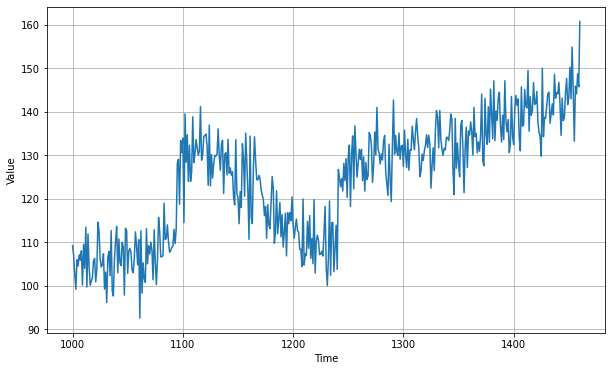

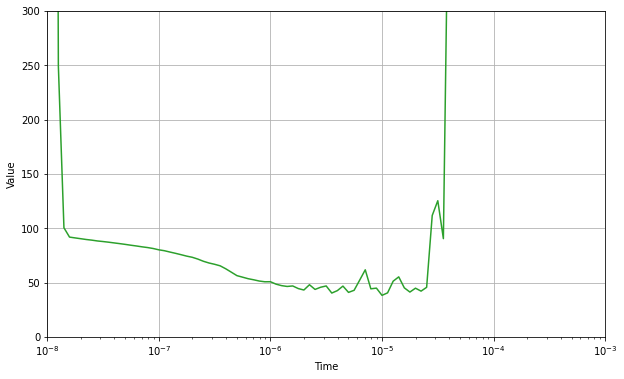

Epoch 1/500
31/31 [==============================] - 1s 3ms/step - loss: 144.0197
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 68.6276
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 57.8026
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 71.6711
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 47.1360
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 46.3501
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 44.1262
Epoch 8/500
31/31 [==============================] - 0s 3ms/step - loss: 44.3599
Epoch 9/500
31/31 [==============================] - 0s 3ms/step - loss: 43.0151
Epoch 10/500
31/31 [==============================] - 0s 3ms/step - loss: 40.5199
Epoch 11/500
31/31 [==============================] - 0s 3ms/step - loss: 42.2440
Epoch 12/500
31/31 [==============================] - 0s 3ms/step - loss: 40.7843
Epoch 13/500
31/31 [====

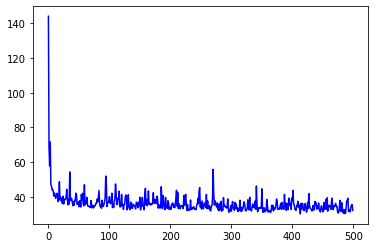

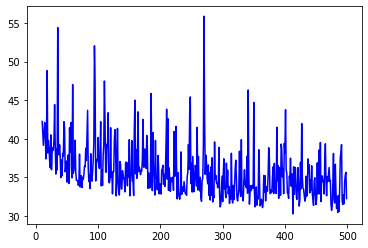

4.8782063

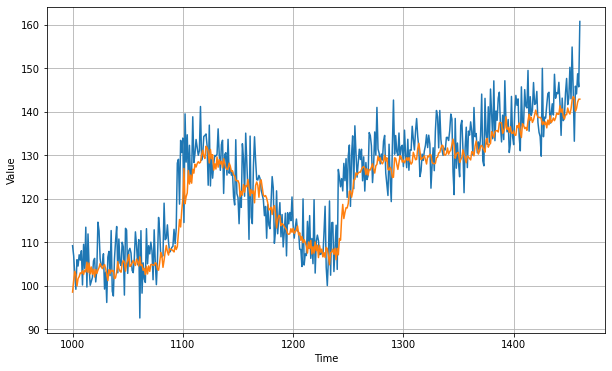

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
amplitude = 20
slope = 0.09
noise_level = 5

# creating the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, verbose=1)

forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch / 20)
)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=1)

lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])
plt.show()

window_size = 30
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=8e-6, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=500, verbose=1)

loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
# print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

### RNN

2.7.0
Epoch 1/100
8/8 [==============================] - 2s 19ms/step - loss: 352.0361 - mae: 352.5360 - lr: 1.0000e-08
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 351.7097 - mae: 352.2095 - lr: 1.1220e-08
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 351.1931 - mae: 351.6930 - lr: 1.2589e-08
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 350.5549 - mae: 351.0548 - lr: 1.4125e-08
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 349.7933 - mae: 350.2931 - lr: 1.5849e-08
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 348.9189 - mae: 349.4189 - lr: 1.7783e-08
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 347.9077 - mae: 348.4072 - lr: 1.9953e-08
Epoch 8/100
8/8 [==============================] - 0s 16ms/step - loss: 346.7540 - mae: 347.2538 - lr: 2.2387e-08
Epoch 9/100
8/8 [==============================] - 0s 19ms/step - loss: 345.4355 -

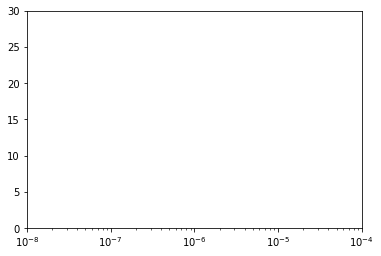

Epoch 1/400
8/8 [==============================] - 2s 20ms/step - loss: 277.2827 - mae: 277.7823
Epoch 2/400
8/8 [==============================] - 0s 19ms/step - loss: 246.8747 - mae: 247.3746
Epoch 3/400
8/8 [==============================] - 0s 17ms/step - loss: 246.5310 - mae: 247.0306
Epoch 4/400
8/8 [==============================] - 0s 14ms/step - loss: 244.5657 - mae: 245.0657
Epoch 5/400
8/8 [==============================] - 0s 15ms/step - loss: 244.4929 - mae: 244.9924
Epoch 6/400
8/8 [==============================] - 0s 15ms/step - loss: 245.9611 - mae: 246.4611
Epoch 7/400
8/8 [==============================] - 0s 14ms/step - loss: 247.3096 - mae: 247.8096
Epoch 8/400
8/8 [==============================] - 0s 14ms/step - loss: 244.6197 - mae: 245.1196
Epoch 9/400
8/8 [==============================] - 0s 18ms/step - loss: 244.3538 - mae: 244.8538
Epoch 10/400
8/8 [==============================] - 0s 17ms/step - loss: 245.2811 - mae: 245.7809
Epoch 11/400
8/8 [===========

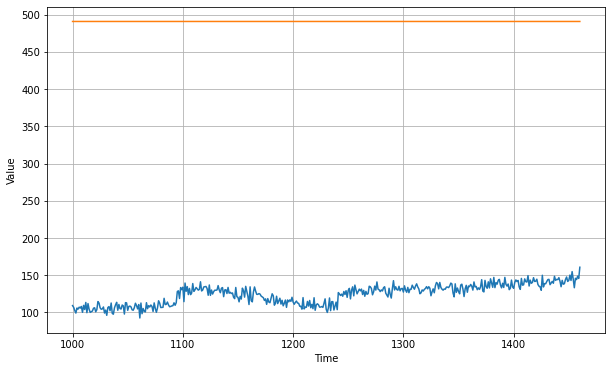

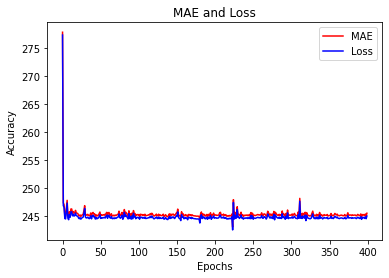

<Figure size 432x288 with 0 Axes>

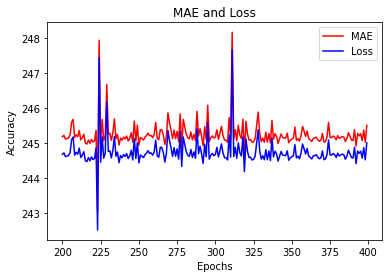

<Figure size 432x288 with 0 Axes>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

split_tim = 1000
time_train = time[:split_time]
x_train = time[:split_time]
time_test = time[split_time:]
x_test = time[split_time:]

window_size = 20
batch_size = 32

shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape=[None]),
                                    tf.keras.layers.SimpleRNN(40, return_sequences=True),
                                    tf.keras.layers.SimpleRNN(40),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: x* 100)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch / 20))

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])
plt.show()

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=400)

forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)
plt.show()

tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()
plt.show()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])
plt.figure()
plt.show()


### SUNSPOTS

In [ ]:
!wget https://raw.githubusercontent.com/hashbanger/tensorflow-developer-preparation/main/coursera/04-sequences-time-series-and-prediction/assets/Sunspots.csv -O ./Sunspots.csv

--2022-01-06 10:18:44--  https://raw.githubusercontent.com/hashbanger/tensorflow-developer-preparation/main/coursera/04-sequences-time-series-and-prediction/assets/Sunspots.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71461 (70K) [text/plain]
Saving to: ‘./Sunspots.csv’

./Sunspots.csv      100%[===================>]  69.79K  --.-KB/s    in 0.01s   

2022-01-06 10:18:44 (5.78 MB/s) - ‘./Sunspots.csv’ saved [71461/71461]



2.7.0


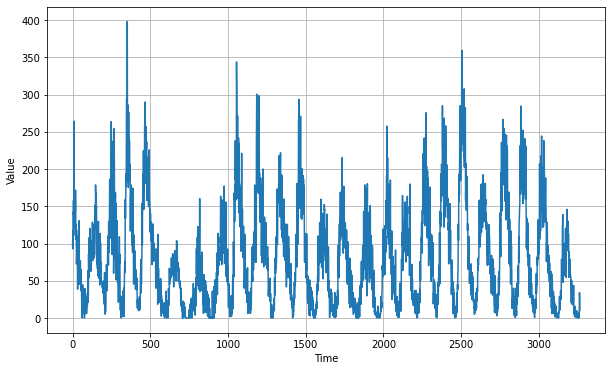

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)
Epoch 1/100
12/12 [==============================] - 10s 378ms/step - loss: 116.9706 - mae: 117.4693 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 5s 365ms/step - loss: 115.2916 - mae: 115.7903 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 5s 371ms/step - loss: 112.8537 - mae: 113.3526 - lr: 1.2589e-08
Epoch 4/100
12/12 [==============================] - 5s 367ms/step - loss: 109.9978 - mae: 110.4971 - lr: 1.4125e-08
Epoch 5/100
12/12 [==============================] - 5s 368ms/step - loss: 106.7918 - mae: 107.2912 - lr: 1.5849e-08
Epoch 6/100
12/12 [==============================] - 5s 362ms/step - loss: 103.2476 - mae: 103.7470 - lr: 1.7783e-08
Epoch 7/100
12/12 [==============================] - 5s 365ms/step - loss: 99.3464 - mae: 99.8459 - lr: 1.9953e-08
Epoch 8/100
12/12 [==============================] - 5s 362ms/step - loss: 95.05

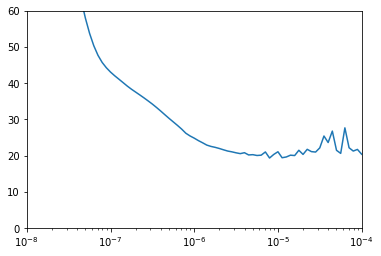

Epoch 1/500
30/30 [==============================] - 8s 139ms/step - loss: 38.9180 - mae: 39.4144
Epoch 2/500
30/30 [==============================] - 4s 137ms/step - loss: 25.7652 - mae: 26.2597
Epoch 3/500
30/30 [==============================] - 4s 139ms/step - loss: 22.0764 - mae: 22.5701
Epoch 4/500
30/30 [==============================] - 4s 139ms/step - loss: 20.4606 - mae: 20.9535
Epoch 5/500
30/30 [==============================] - 4s 137ms/step - loss: 19.7099 - mae: 20.2024
Epoch 6/500
30/30 [==============================] - 4s 138ms/step - loss: 19.3147 - mae: 19.8068
Epoch 7/500
30/30 [==============================] - 4s 138ms/step - loss: 18.7048 - mae: 19.1970
Epoch 8/500
30/30 [==============================] - 4s 139ms/step - loss: 18.1249 - mae: 18.6166
Epoch 9/500
30/30 [==============================] - 4s 138ms/step - loss: 18.0666 - mae: 18.5581
Epoch 10/500
30/30 [==============================] - 5s 142ms/step - loss: 17.9098 - mae: 18.4011
Epoch 11/500
30/30 

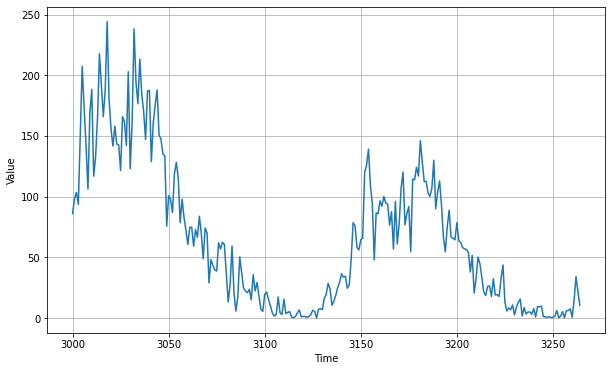

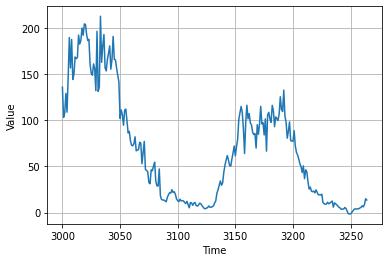

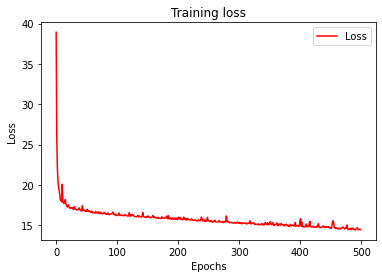

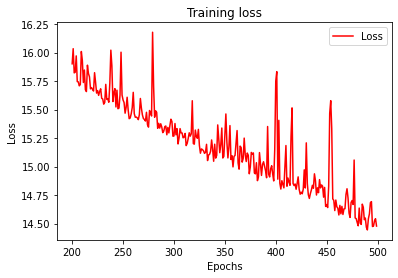

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

def plot_series(time, series, format='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

import csv
time_step = []
sunspots = []

with open('Sunspots.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    next(reader)
    for row in reader:
        sunspots.append(float(row[2]))
        time_step.append(float(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv1D(filters=32, kernel_size=4, strides=1, padding="causal",
                                                           activation="relu", input_shape=[None, 1]),
                                    tf.keras.layers.LSTM(64, return_sequences=True),
                                    tf.keras.layers.LSTM(64, return_sequences=True),
                                    tf.keras.layers.Dense(30, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: x*400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])
plt.show()

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.show()


zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.show()

In [ ]:
print(rnn_forecast)

[ 1.35939484e+02  1.03122353e+02  1.07854065e+02  1.29223846e+02
  1.08848190e+02  1.47394867e+02  1.89780869e+02  1.56790619e+02
  1.87813980e+02  1.44311218e+02  1.50012405e+02  1.68677536e+02
  1.66905807e+02  1.67967682e+02  1.92483276e+02  1.82719696e+02
  1.86667938e+02  2.00119476e+02  1.92287476e+02  2.04571106e+02
  2.03981857e+02  1.92893570e+02  1.86521866e+02  1.87829178e+02
  1.60574875e+02  1.51088425e+02  1.48912125e+02  1.61187332e+02
  1.56054123e+02  1.32184387e+02  1.96561844e+02  1.31382050e+02
  1.36063919e+02  2.12918182e+02  1.62957764e+02  1.81050842e+02
  1.93076706e+02  1.57009201e+02  1.53598175e+02  1.65926987e+02
  1.72638885e+02  1.80771622e+02  1.55543762e+02  1.66109390e+02
  1.91042328e+02  1.66128891e+02  1.65595352e+02  1.56555115e+02
  1.48850113e+02  1.41433136e+02  1.02085449e+02  1.11270630e+02
  1.06038406e+02  9.46560745e+01  1.11224770e+02  1.12193611e+02
  9.97233887e+01  8.63376236e+01  8.79986877e+01  7.78554077e+01
  7.28274841e+01  7.24228